In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

This is a quick introduction to some OpenCV tools you might find useful in this project. Visit https://docs.opencv.org/master/d9/df8/tutorial_root.html for more tutorials and details. We'll start with some basic image processing.

### Image thresholding - primitive colour detection

In [2]:
im = cv2.imread('blocks.png') #load an image


print("A colour image is a 2D grid of numbers, with 3 channels for colour components. Image Shape: ", im.shape)
print("We can access image pixel values by array indexing. Im[10,10,:]: ", im[10,10,:])


A colour image is a 2D grid of numbers, with 3 channels for colour components. Image Shape:  (318, 454, 3)
We can access image pixel values by array indexing. Im[10,10,:]:  [192 180 167]


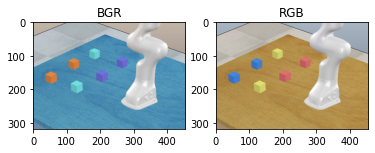

In [3]:
# Our image is stored with channels ordered as blue, green, red 
plt.subplot(1,2,1)
plt.imshow(im) # our plotting expects channels red,green,blue
plt.title('BGR')
plt.subplot(1,2,2)
plt.imshow(im[:,:,[2,1,0]]) # Reversing the channel order shows the true image
plt.title('RGB')
plt.show()

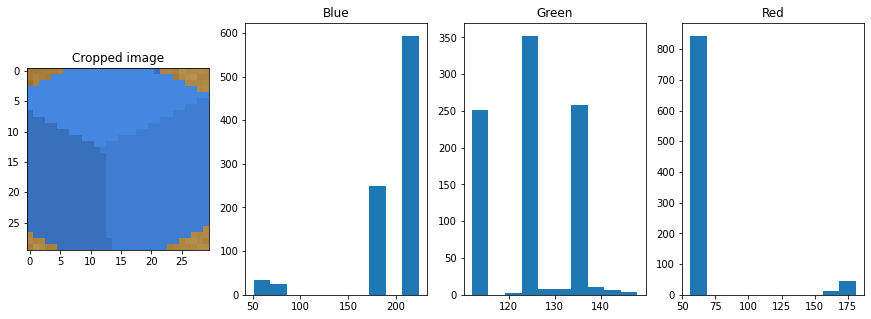

In [4]:
# Lets manually crop out a blue block
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(im[150:180,40:70,[2,1,0]])
plt.title('Cropped image')

# Lets plot a histogram of the colours in this patch

plt.subplot(1,4,2)
plt.hist(im[150:180,40:70,0].ravel())
plt.title('Blue')
plt.subplot(1,4,3)
plt.hist(im[150:180,40:70,1].ravel())
plt.title('Green')
plt.subplot(1,4,4)
plt.hist(im[150:180,40:70,2].ravel())
plt.title('Red')
plt.show()

# Looks like most of the colours are between 
# 150-250 in the blue channel
# 0 - 150 in the green channel
# 50 - 75 in the red channel

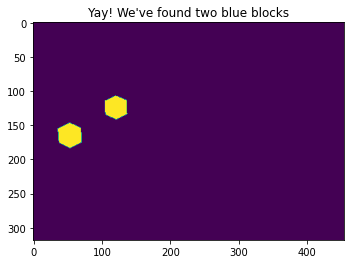

In [5]:
# Lets threshold the image so that only these blocks remain - we'll use the opencv inRange function
im_threshold = cv2.inRange(im, (150, 0, 50), (250, 150, 75))
plt.imshow(im_threshold)
plt.title('Yay! We\'ve found two blue blocks')
plt.show()

### Blob detection - primitive object detection using colour, shape or size

In [6]:
# We'll now use an opencv simple blob detection function to find the centroids of these blobs in this thresholded image.
# Note, the simple blob detector can also threshold based on colour internally. Read the opencv documentation to learn more. 

# There are many parameters to tune

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.filterByInertia = False
params.filterByConvexity = False
params.filterByColor = False

params.minArea = 50
params.maxArea = 1000

detector = cv2.SimpleBlobDetector_create(params) # create a blob detector

In [7]:
# Detect keypoints
keypoints = detector.detect(im_threshold)

print("Keypoints is a list of 2D co-ordinates, eg: Keypoint 1: ",keypoints[0].pt)

Keypoints is a list of 2D co-ordinates, eg: Keypoint 1:  (53.35169219970703, 164.78221130371094)


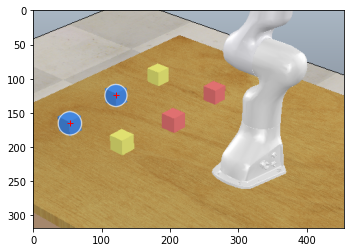

In [8]:
# Lets use an opencv function to draw circles around the detected objects
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints[:,:,[2,1,0]],extent=[0,im.shape[1],im.shape[0],0])
plt.plot([keypoints[0].pt[0]],[keypoints[0].pt[1]],'r+')
plt.plot([keypoints[1].pt[0]],[keypoints[1].pt[1]],'r+')
plt.show()

Cool, we have a simple object recognition strategy (assuming they are distinct in colour, shape or size). You may find that lighting and motion blur makes this ineffective through. You'll also find that your robot moves in a 3D world, but this is a 2D detection in image space. Mapping between these spaces can be difficult. If you know the geometry of the object and properties of your camera, it is possible to infer the 3D location of the object. (See https://docs.opencv.org/master/d9/d0c/group__calib3d.html)

But if you don't know this, the best option might be to do visual servoing - rotating the robot so that the target object moves to a desired position in the image. You could try to adopt a proportional control approach, like the one we used previously, but acting on the image error.